In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv'
df = pd.read_csv(url)
#or use
#df=pd.read_csv(r"D:\ML_pract\Wine.csv")
#df

In [17]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [18]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [19]:
df['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

In [20]:
X=df.drop('Customer_Segment',axis=1)
y=df['Customer_Segment']
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
pca=PCA()
X_pca=pca.fit_transform(X_scaled)
explained_variance_ratio=pca.explained_variance_ratio_


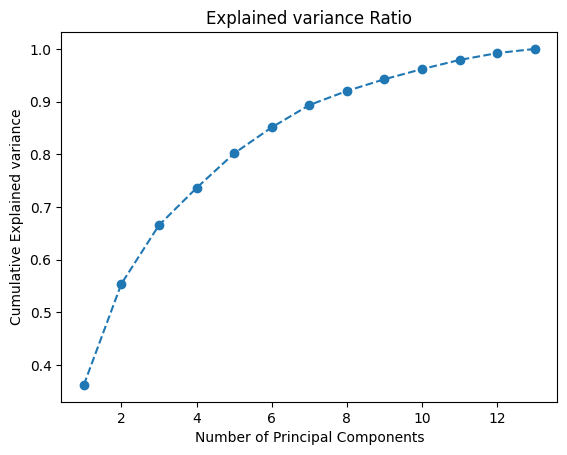

In [21]:

plt.plot(range(1,len(explained_variance_ratio)+1),explained_variance_ratio.cumsum(),marker="o",linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained variance")
plt.title("Explained variance Ratio")
plt.show()

In [22]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

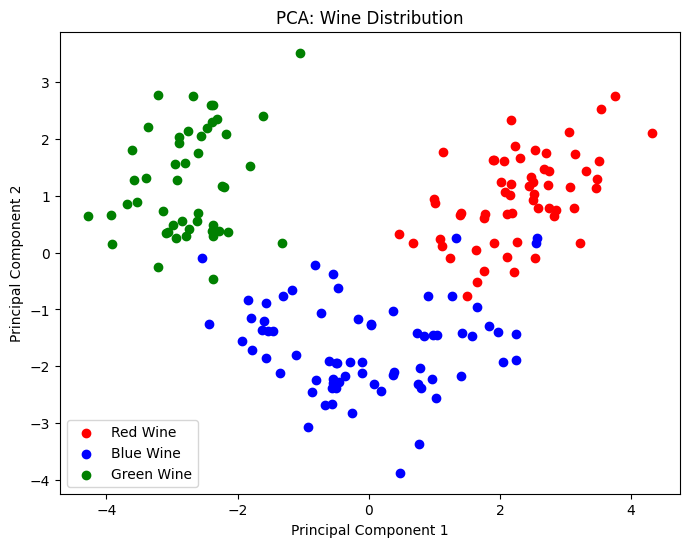

In [23]:
plt.figure(figsize=(8,6))
for target, color, label in zip([1,2,3], ['red','blue','green'], ['Red Wine','Blue Wine','Green Wine']):
    indices = (y == target)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], c=color, label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Wine Distribution')
plt.legend()
plt.show()